# Algorithms


In [69]:
import os
import re
import uuid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def sciencify(df, show_std=True):
    mean, std = df.groupby(level=0).mean(), df.groupby(level=0).std()
    mean_log10 = np.log10(mean)
    df_exponent = mean_log10.applymap(lambda x: int(np.floor(x)))
    mean_mantissa = mean.combine(df_exponent, lambda x, y: x / 10**y).applymap(
        lambda x: f'{x:.3f}'
    )
    std_mantissa = std.combine(df_exponent, lambda x, y: x / 10**y).applymap(
        lambda x: f'{x:.3f}'
    )
    df_exponent = df_exponent.applymap(lambda x: f'10^{{{x}}}')
    return (
        (
            (mean_mantissa + r' \pm ' + std_mantissa).applymap(lambda x: f'({x})')
            if show_std
            else mean_mantissa
        )
        + r' \times '
        + df_exponent
    ).applymap(lambda x: f'${x}$')

## Lab 1: Sorting


### Task 1


In [70]:
col_names = [
    r'$\mathtt{std::sort}$',
    r'$\mathtt{std::qsort}$',
    'Insertion',
    'Merge',
    'Quick',
    'Rand. Quick',
    'Heap',
    'Radix',
    'Bucket',
]

cols = [
    'Insertion',
    'Merge',
    'Quick',
    'Heap',
    'Radix',
    'Bucket',
]

df1 = pd.read_csv('data/lab1_main1.csv', names=col_names, index_col=[0, 1])
df1.rename_axis(['$n$', None], inplace=True)
df1

$\mathtt{std::sort}$  $\mathtt{std::qsort}$  Insertion     Merge   
$n$                                                                          
50000  0              0.002560               0.003889    1.77817  0.009313  \
       1              0.001590               0.002553    1.84099  0.010458   
       2              0.001626               0.002542    1.83693  0.009110   
       3              0.001589               0.002482    1.76087  0.009437   
       4              0.001693               0.002518    1.75913  0.009383   
100000 0              0.006124               0.005421    7.04653  0.018510   
       1              0.003055               0.004940    7.02795  0.018700   
       2              0.003174               0.004862    6.80227  0.019450   
       3              0.003122               0.004970    6.81755  0.018729   
       4              0.003187               0.004907    6.65304  0.018945   
150000 0              0.004689               0.007158   15.09190  0.027831   
       1              0.004655               0.007443   15.22500  0.027448   
       2              0.004580               0.007064   15.33200  0.028732   
       3              0.004638               0.007146   15.41610  0.027394   
       4              0.004625               0.007125   14.94020  0.026963   
200000 0              0.006025               0.009490   26.64750  0.036940   
       1              0.006112               0.009627   28.85810  0.230237   
       2              0.010568               0.010100   35.98350  0.037110   
       3              0.006161               0.009106   26.98370  0.037273   
       4              0.006123               0.009328   26.67620  0.036877   
250000 0              0.007398               0.011916   42.03380  0.046839   
       1              0.007342               0.011600   43.35980  0.045502   
       2              0.007538               0.011855   47.83300  0.046148   
       3              0.008348               0.012720   42.83230  0.045444   
       4              0.007841               0.011722   42.54940  0.045767   
300000 0              0.009269               0.014312   60.40790  0.056231   
       1              0.008797               0.014184   62.07050  0.058597   
       2              0.009325               0.014441   60.62090  0.055342   
       3              0.009050               0.013811   59.63570  0.054724   
       4              0.009099               0.014018   59.76320  0.053932   
350000 0              0.010365               0.016115   82.16420  0.065276   
       1              0.010751               0.016745   82.10380  0.064442   
       2              0.009888               0.016303   83.82390  0.066130   
       3              0.010811               0.017177   82.24270  0.071369   
       4              0.010660               0.016177   82.47000  0.077915   
400000 0              0.012060               0.018781  108.45900  0.073447   
       1              0.011729               0.018509  107.09600  0.081712   
       2              0.011875               0.018700  107.12500  0.073644   
       3              0.011915               0.018726  107.44500  0.074419   
       4              0.011798               0.018869  108.33600  0.073635   
450000 0              0.013529               0.020748  136.62400  0.084151   
       1              0.014122               0.025257  136.33400  0.081776   
       2              0.013694               0.021141  137.70700  0.083398   
       3              0.013101               0.020848  137.09800  0.082113   
       4              0.013554               0.020804  136.63800  0.082113   
500000 0              0.014966               0.022834  168.57200  0.094800   
       1              0.015715               0.028157  168.64500  0.093022   
       2              0.014663               0.023792  166.63700  0.098243   
       3              0.020531               0.029472  168.53000  0.092970   
       4              0.014938  

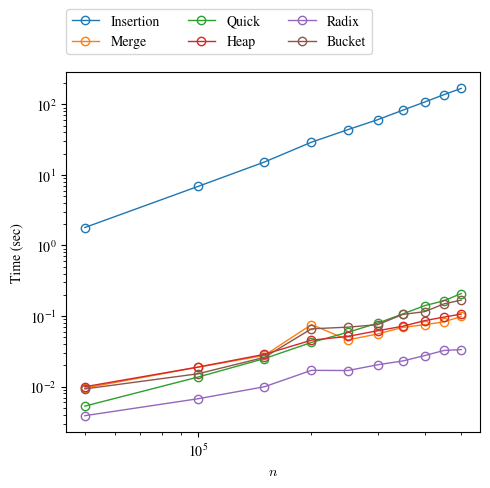

In [71]:
plt.figure(figsize=(5, 5))
plt.xlabel('$n$')
plt.ylabel('Time (sec)')
plt.xscale('log')
plt.yscale('log')
for i, col in enumerate(cols):
    plt.plot(
        df1.index.get_level_values(0).unique(),
        df1[col].groupby(level=0).mean(),
        label=col,
        marker='o',
    )
plt.legend(loc=(0, 1.05), ncol=len(cols) // 2)
plt.tight_layout()
plt.savefig(f'plots/lab1_main1.svg', bbox_inches='tight')
plt.show()

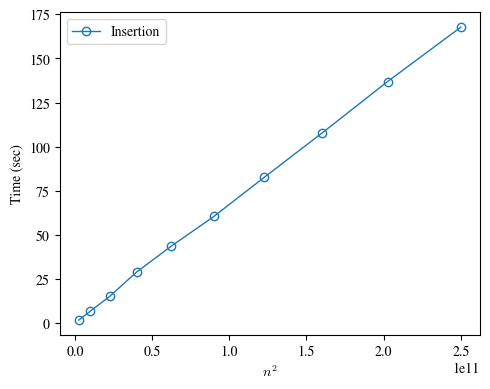

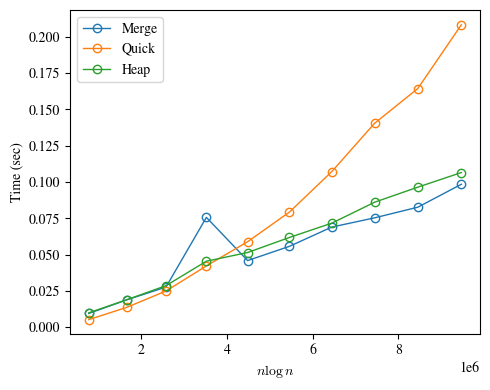

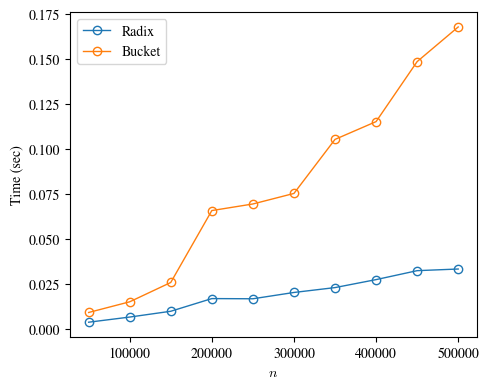

In [72]:
xscale_funcs = [
    lambda x: x * x,
    lambda x: x * np.log2(x),
    lambda x: x,
]

xscale_labels = [
    r'$n^2$',
    r'$n \log{n}$',
    r'$n$',
]

col_name_lists = [
    ['Insertion'],
    ['Merge', 'Quick', 'Heap'],
    ['Radix', 'Bucket'],
]


for i, (xscale_func, xscale_label, col_names) in enumerate(
    zip(xscale_funcs, xscale_labels, col_name_lists)
):
    plt.figure(figsize=(5, 4))
    plt.xlabel(xscale_label)
    plt.ylabel('Time (sec)')
    for col_name in col_names:
        n = df1.index.get_level_values(0).unique()
        x = xscale_func(n)
        y = df1[col_name].groupby(level=0).mean()
        plt.plot(x, y, label=col_name, marker='o')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'plots/lab1_main1_{i}.svg', bbox_inches='tight')
    plt.show()

### Task 2


In [73]:
col_names = [
    r'$\mathtt{std::sort}$',
    r'$\mathtt{std::qsort}$',
    'Insertion',
    'Merge',
    'Quick',
    'Rand. Quick',
    'Heap',
    'Radix',
    'Bucket',
]

df2 = pd.read_csv('data/lab1_main2.csv', index_col=[0, 1], names=col_names)
df2.rename_axis(['Distribution', None], inplace=True)
df2

$\mathtt{std::sort}$  $\mathtt{std::qsort}$  Insertion   
Distribution                                                             
Degenerate   0              0.000065               0.000166   0.000236  \
             1              0.000067               0.000168   0.000234   
             2              0.000065               0.000168   0.000233   
             3              0.000065               0.000182   0.000234   
             4              0.000065               0.000173   0.000235   
Discrete     0              0.000971               0.001575   6.036600   
             1              0.001282               0.001969   6.377830   
             2              0.001323               0.001556   6.029820   
             3              0.001029               0.001475   6.198900   
             4              0.001015               0.001476   5.967130   
Gaussian     0              0.001267               0.001958   6.267380   
             1              0.001330               0.002015   6.288030   
             2              0.001405               0.002006   6.294140   
             3              0.001326               0.002038   6.245330   
             4              0.001191               0.001953   6.274180   
Left skewed  0              0.002133               0.003347   6.570320   
             1              0.002211               0.003403   6.589250   
             2              0.002173               0.003210   6.618010   
             3              0.002222               0.003326   6.582310   
             4              0.002111               0.003306   6.679860   
Right skewed 0              0.002114               0.003207   6.701760   
             1              0.002292               0.003327   6.639980   
             2              0.002311               0.003940   6.667090   
             3              0.002158               0.003248   6.767700   
             4              0.002161               0.003252   6.724450   
Uniform      0              0.003054               0.004762   6.705570   
             1              0.003282               0.004912   6.850280   
             2              0.003286               0.005073   6.781150   
             3              0.003005               0.004677   6.621180   
             4              0.002987               0.004648   6.588570   

                   Merge     Quick  Rand. Quick      Heap     Radix    Bucket  
Distribution                                                                   
Degenerate   0  0.012779  6.433940     6.644060  0.001291  0.006750  0.011566  
             1  0.014913  6.495860     6.445510  0.001286  0.006774  0.011439  
             2  0.013425  6.501450     6.558060  0.001289  0.006624  0.011317  
             3  0.012790  6.670910     6.417100  0.001299  0.006773  0.011539  
             4  0.012782  6.472640     6.489210  0.001285  0.006661  0.011302  
Discrete     0  0.015500  0.645741     0.668891  0.013853  0.006812  0.014801  
             1  0.015373  0.646521     0.674524  0.015872  0.007640  0.015483  
             2  0.015363  0.645380     0.650632  0.013517  0.006826  0.012411  
             3  0.016420  0.655577     0.647450  0.013212  0.006761  0.014842  
             4  0.016163  0.644783     0.644205  0.013193  0.006633  0.013218  
Gaussian     0  0.015933  0.365804     0.365179  0.015104  0.006751  0.013159  
             1  0.015577  0.366352     0.370513  0.015051  0.006635  0.013212  
             2  0.015394  0.364913     0.365516  0.015225  0.006675  0.013575  
             3  0.016447  0.364772     0.364908  0.015082  0.006614  0.013148  
             4  0.016251  0.364555     0.364923  0.015062  0.006668  0.013278  
Left skewed  0  0.017164  0.073205     0.071602  0.017087  0.006598  0.014132  
             1  0.017714  0.069691     0.069825  0.017026  0.006641  0.013498  
             2  0.017162  0.069599     0.070097  0.017080  0.006775  0.013714  
             3  0.017185  0.069548     0.070670

In [74]:
hist_df = pd.read_csv('data/lab1_main2_hist.csv', header=None, index_col=0).T
hist_df

,Degenerate,Discrete,Gaussian,Left skewed,Right skewed,Uniform
1,0,0,0,1949,0,109
2,0,0,0,1829,0,122
3,0,0,0,1942,0,105
4,0,0,0,1872,0,92
5,0,0,0,1889,0,90
...,...,...,...,...,...,...
996,0,0,0,0,1823,101
997,0,0,0,0,1871,99
998,0,0,0,0,1827,112
999,0,0,0,0,1952,93


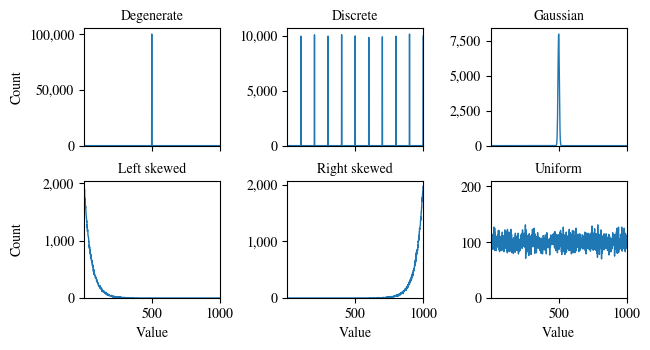

In [75]:
fig, axes = plt.subplots(
    figsize=(7, 3.5),
    ncols=3,
    nrows=2,
    sharex=True,
    gridspec_kw={'hspace': 0.3, 'wspace': 0.5},
)
for i, dist in enumerate(hist_df.columns):
    ax = axes[i // 3, i % 3]
    ax.set_title(dist, fontsize=10)
    ax.set_xlim(1, 1000)
    ax.set_ylim(0, 1.05 * max(hist_df[dist].max(), 200))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    ax.plot(hist_df[dist])

for i in range(2):
    axes[i, 0].set_ylabel('Count')
for j in range(3):
    axes[1, j].set_xlabel('Value')

fig.align_ylabels(axes[:, 0])
fig.savefig(f'plots/lab1_main2_hist.svg', bbox_inches='tight')

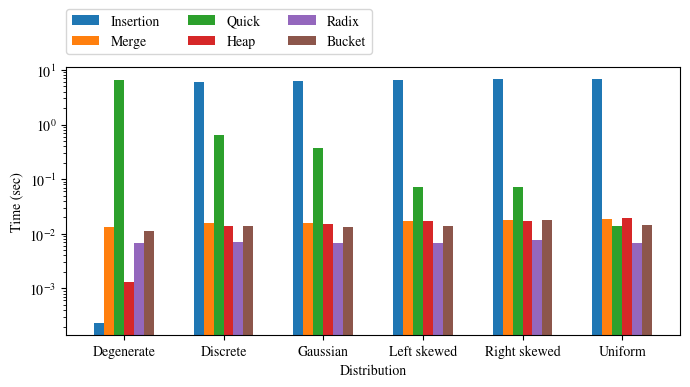

In [76]:
plt.figure(figsize=(7, 4))
plt.xlabel('Distribution')
plt.ylabel('Time (sec)')
plt.yscale('log')
width = 0.1
x = np.arange(len(hist_df.columns))
for i, col in enumerate(cols):
    plt.bar(x + i * width, df2.groupby(level=0)[col].mean(), width=width, label=col)
plt.xticks(x + width * (len(cols) - 1) / 2, hist_df.columns)
plt.legend(loc=(0, 1.05), ncol=len(cols) // 2)
plt.tight_layout()
plt.savefig(f'plots/lab1_main2.svg', bbox_inches='tight')
plt.show()

In [77]:
for i in range(0, len(df1.columns), 3):
    print(sciencify(df1.iloc[:, i : i + 3]).to_markdown(colalign=('center',) * 4))
    print()


for i in range(0, len(df2.columns), 3):
    print(sciencify(df2.iloc[:, i : i + 3]).to_markdown(colalign=('center',) * 4))
    print()

|  $n$   |        $\mathtt{std::sort}$        |       $\mathtt{std::qsort}$        |             Insertion             |
|:------:|:----------------------------------:|:----------------------------------:|:---------------------------------:|
| 50000  | $(1.812 \pm 0.421) \times 10^{-3}$ | $(2.797 \pm 0.611) \times 10^{-3}$ | $(1.795 \pm 0.041) \times 10^{0}$ |
| 100000 | $(3.732 \pm 1.338) \times 10^{-3}$ | $(5.020 \pm 0.228) \times 10^{-3}$ | $(6.869 \pm 0.166) \times 10^{0}$ |
| 150000 | $(4.637 \pm 0.040) \times 10^{-3}$ | $(7.187 \pm 0.147) \times 10^{-3}$ | $(1.520 \pm 0.019) \times 10^{1}$ |
| 200000 | $(6.998 \pm 1.996) \times 10^{-3}$ | $(9.530 \pm 0.373) \times 10^{-3}$ | $(2.903 \pm 0.399) \times 10^{1}$ |
| 250000 | $(7.693 \pm 0.414) \times 10^{-3}$ | $(1.196 \pm 0.044) \times 10^{-2}$ | $(4.372 \pm 0.235) \times 10^{1}$ |
| 300000 | $(9.108 \pm 0.208) \times 10^{-3}$ | $(1.415 \pm 0.025) \times 10^{-2}$ | $(6.050 \pm 0.097) \times 10^{1}$ |
| 350000 | $(1.050 \pm 0.038) \t

## Lab 2: Search Trees


Red-Black Tree


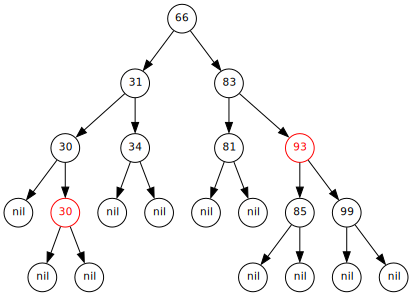

AVL Tree


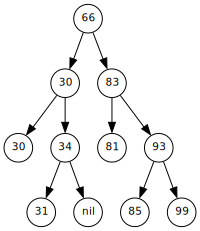

B Tree


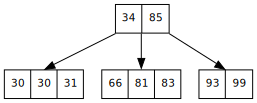

Binary Search Tree


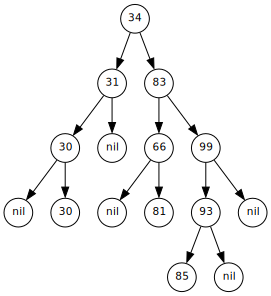

B+ Tree


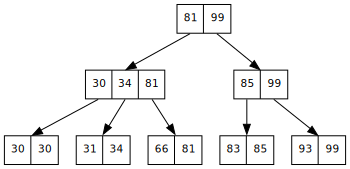

In [78]:
import graphviz
from IPython.display import SVG

filenames = [
    f for f in os.listdir('data') if f.startswith('lab2_test_') and f.endswith('.csv')
]
names = [re.search(r'lab2_test_(.+)\.csv', filename).group(1) for filename in filenames]

B_TREE_ORDER = 5
# filenames, names = filenames[4:5], names[4:5]
for filename, name in zip(filenames, names):
    print(name)
    df = pd.read_csv(f'data/{filename}', header=None, index_col=0)
    dot = graphviz.Digraph(
        comment=name,
        graph_attr={'ordering': 'out', 'splines': 'false'},
    )

    def row_to_node(row):
        parent, row = row.name, list(row)
        base_attrs = {'fontname': 'CMU Serif', 'fontsize': '10.5', 'height': '0.4'}
        attrs = base_attrs
        # Get children
        if name == 'Red-Black Tree':
            children = row[1:-1]
        elif name == 'B Tree':
            size = row[-1]
            children = (
                row[B_TREE_ORDER : size + B_TREE_ORDER + 1]
                if row[B_TREE_ORDER] != '0x0'
                else []
            )
        elif name == 'B+ Tree':
            size = row[-1]
            children = (
                row[B_TREE_ORDER + 1 : size + B_TREE_ORDER + 1]
                if row[B_TREE_ORDER + 1] != '0x0'
                else []
            )
        else:
            children = row[1:]
            if all(child == '0x0' for child in children):
                children = []
        # Get node value(s)
        if name in ['B Tree', 'B+ Tree']:
            items = [f'<{i}> {v}' for i, v in enumerate(row[1 : size + 1])]
            value = str.join('|', map(str, items))
        else:
            value = str(row[0])
        # Get node attributes
        if name in ['B Tree', 'B+ Tree']:
            attrs = attrs | {'shape': 'record'}
        else:
            attrs = attrs | {'shape': 'circle', 'fixedsize': 'true'}
        if name == 'Red-Black Tree' and row[-1] == 'R':
            attrs = attrs | {'color': 'red', 'fontcolor': 'red'}

        def child_to_edge(i, child):
            if name == 'B Tree':
                if i == size:
                    return (f'{parent}:{size - 1}:se', f'{child}:n')
                else:
                    return (f'{parent}:{i}:sw', f'{child}:n')

            if name == 'B+ Tree':
                return (f'{parent}:{i}:s', f'{child}:n')
            else:
                if child == '0x0':
                    child = uuid.uuid4().hex
                    dot.node(
                        child,
                        'nil',
                        **(base_attrs | {'shape': 'circle', 'fixedsize': 'true'}),
                    )
                return (str(parent), f'{child}')

        dot.node(str(parent), value, **attrs)
        dot.edges(child_to_edge(i, child) for i, child in enumerate(children))

    df.apply(row_to_node, axis=1)
    # print(dot.source)
    display(dot)
    dot.render(f'plots/lab2_{name}', format='svg', cleanup=True)

Insert


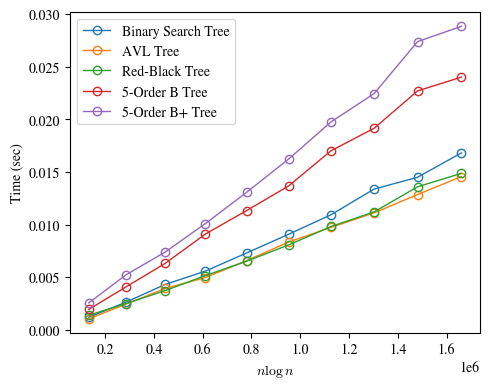

Search


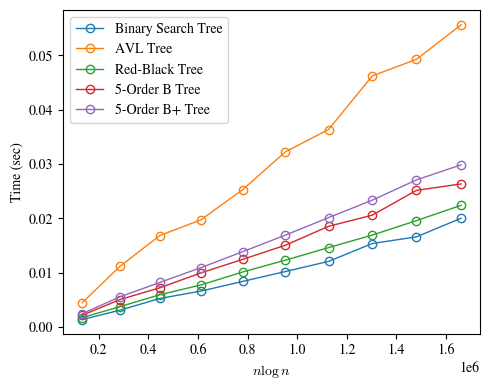

Delete


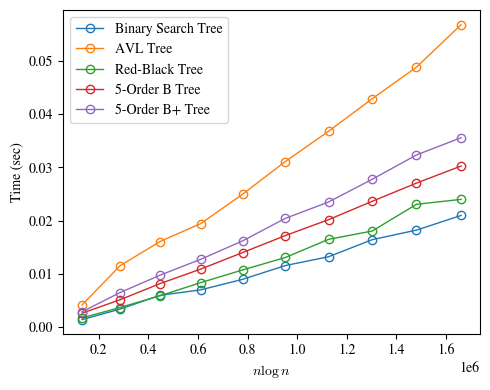

In [79]:
col_names = [
    'Binary Search Tree',
    'AVL Tree',
    'Red-Black Tree',
    '5-Order B Tree',
    '5-Order B+ Tree',
]
filenames = [
    'data/lab2_main_search.csv',
    'data/lab2_main_insert.csv',
    'data/lab2_main_delete.csv',
]
op_names = ['Insert', 'Search', 'Delete']

for filename, op_name in zip(filenames, op_names):
    df = pd.read_csv(filename, names=col_names, index_col=[0, 1])
    df.rename_axis(['N', 'Seed'], inplace=True)
    print(op_name)
    plt.figure(figsize=(5, 4))
    plt.xlabel(r'$n \log{n}$')
    plt.ylabel('Time (sec)')
    for col_name in col_names:
        n = df.index.get_level_values(0).unique()
        x = n * np.log2(n)
        y = df[col_name].groupby(level=0).mean()
        plt.plot(x, y, label=col_name, marker='o')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'plots/lab2_main_{op_name}.svg', bbox_inches='tight')
    plt.show()

In [80]:
for filename, op_name in zip(filenames, op_names):
    print(op_name)
    print()
    print(sciencify(df.iloc[:, :3]).to_markdown(colalign=('center',) * 4))
    print()
    print(sciencify(df.iloc[:, 3:]).to_markdown(colalign=('center',) * 3))
    print()

Insert

|   N    |         Binary Search Tree         |              AVL Tree              |           Red-Black Tree           |
|:------:|:----------------------------------:|:----------------------------------:|:----------------------------------:|
| 10000  | $(1.387 \pm 0.018) \times 10^{-3}$ | $(4.153 \pm 0.143) \times 10^{-3}$ | $(1.703 \pm 0.061) \times 10^{-3}$ |
| 20000  | $(3.358 \pm 0.729) \times 10^{-3}$ | $(1.151 \pm 0.454) \times 10^{-2}$ | $(3.657 \pm 0.130) \times 10^{-3}$ |
| 30000  | $(5.945 \pm 1.256) \times 10^{-3}$ | $(1.603 \pm 0.222) \times 10^{-2}$ | $(5.847 \pm 0.160) \times 10^{-3}$ |
| 40000  | $(6.979 \pm 0.228) \times 10^{-3}$ | $(1.944 \pm 0.060) \times 10^{-2}$ | $(8.343 \pm 0.583) \times 10^{-3}$ |
| 50000  | $(8.958 \pm 0.333) \times 10^{-3}$ | $(2.496 \pm 0.055) \times 10^{-2}$ | $(1.072 \pm 0.053) \times 10^{-2}$ |
| 60000  | $(1.154 \pm 0.086) \times 10^{-2}$ | $(3.109 \pm 0.086) \times 10^{-2}$ | $(1.306 \pm 0.054) \times 10^{-2}$ |
| 70000  | $(1.3

## Lab 3: 0-1 Knapsack


### Classical Algorithms


In [81]:
from ctypes import *

import numpy as np
import pandas as pd


class CSolver:
    def __init__(self, path):
        self.clib = CDLL(path)
        self.clib.solve.restype = c_float

    def solve(self, n, c, w, v, *args):
        n = c_int(n)
        c = c_int(c)
        w = w.ctypes.data_as(POINTER(c_int))
        v = v.ctypes.data_as(POINTER(c_int))
        m = c_int(0)
        x = np.zeros(n.value, dtype=np.int32).ctypes.data_as(POINTER(c_int))
        # self.clib.solve(n, c, w, v, byref(m), x, *args)
        t = self.clib.solve(n, c, w, v, byref(m), x, *args)
        return m.value, t * 1000, x[: n.value]


class DCSolver(CSolver):
    def __init__(self, *, budget):
        super().__init__('lib/divide_and_conquer.dylib')
        self.budget = budget

    def solve(self, n, c, w, v):
        return super().solve(n, c, w, v, c_float(self.budget))


class DPSolver(CSolver):
    def __init__(self):
        super().__init__('lib/dynamic_programming.dylib')


class GreedySolver(CSolver):
    def __init__(self):
        super().__init__('lib/greedy.dylib')


class BTSolver(CSolver):
    def __init__(self, *, budget):
        super().__init__('lib/backtracking.dylib')
        self.budget = budget

    def solve(self, n, c, w, v):
        return super().solve(n, c, w, v, c_float(self.budget))


class BBSolver(CSolver):
    def __init__(self):
        super().__init__('lib/branch_and_bound.dylib')


class MCSolver(CSolver):
    def __init__(self, *, max_T, min_T, budget, seed):
        super().__init__('lib/monte_carlo.dylib')
        self.max_T = max_T
        self.min_T = min_T
        self.budget = budget
        self.seed = seed

    def solve(self, n, c, w, v):
        return super().solve(
            # fmt: off
            n, c, w, v,
            # fmt: on
            c_float(self.max_T),
            c_float(self.min_T),
            c_float(self.budget),
            c_uint(self.seed),
        )


def solve(name: str, n, c, w, v, *, verbose=0, budget=0.1, max_T=1, min_T=0, seed=42):
    if name == 'Deep Reinforcement Learning':
        raise NotImplementedError
    elif name == 'Divide and Conquer':
        solver = DCSolver(budget=budget)
    elif name == 'Dynamic Programming':
        solver = DPSolver()
    elif name == 'Greedy':
        solver = GreedySolver()
    elif name == 'Backtracking':
        solver = BTSolver(budget=budget)
    elif name == 'Branch and Bound':
        solver = BBSolver()
    elif name == 'Monte Carlo':
        solver = MCSolver(budget=budget, max_T=max_T, min_T=min_T, seed=seed)
    m, t, x = solver.solve(n, c, w, v)
    result = {'Value': m, 'Time (ms)': t, 'Solution': ''.join(map(str, x))}
    cw = np.sum(w * x)
    cv = np.sum(v * x)
    if cw > c or cv != m:
        print(f'Warning: {name} returns an invalid solution!')
        verbose = 2
    if verbose == 2:
        print(name)
        print(f'n = {n}, c = {c}')
        print(f'w = {w}')
        print(f'v = {v}')
        print(f'x = {x}')
        print(f'm = {m}, cw = {np.sum(w * x)}, cv = {np.sum(v * x)}')
    elif verbose == 1:
        print(pd.DataFrame([result], [name]))
    elif verbose == 0:
        pass
    return result


def run_trial(trial, n, c, w, v, names, **kwargs):
    return [
        {
            'Trial': trial,
            'Name': name,
            **solve(name, n, c, w[trial], v[trial], verbose=0, **kwargs),
        }
        for name in names
    ]

In [82]:
from itertools import chain
from joblib import Parallel, delayed


def run_trials(
    num_trials=100,
    *,
    n=25,
    c=500,
    names=[
        'Divide and Conquer',
        'Dynamic Programming',
        'Greedy',
        'Backtracking',
        'Branch and Bound',
        'Monte Carlo',
    ],
    **kwargs,
):
    np.random.seed(42)
    w = np.random.randint(1, 100, (num_trials, n), dtype=np.int32)
    v = np.random.randint(1, 100, (num_trials, n), dtype=np.int32)
    results = Parallel(n_jobs=-1, prefer='threads')(
        delayed(run_trial)(trial, n, c, w, v, names, **kwargs) for trial in range(num_trials)
    )
    results = list(chain.from_iterable(results))
    results = pd.DataFrame(results)
    results.set_index(['Trial', 'Name'], inplace=True)
    real_solution = results.groupby('Trial')['Value'].max().to_list()
    results['Optimality Gap'] = results.groupby('Name')['Value'].transform(
        lambda x: 1 - x / real_solution
    )
    stats = (
        results.groupby('Name', sort=False)[['Time (ms)', 'Optimality Gap']]
        .mean()
        .rename_axis(None, axis=0)
    )
    return results, stats


res, stats = run_trials(100, n=25, c=500)
display(stats)
display(res.loc[0])

,Time (ms),Optimality Gap
Divide and Conquer,101.87913,0.256807
Dynamic Programming,0.94176,0.000000
Greedy,0.06344,0.006939
Backtracking,102.53091,0.171247
Branch and Bound,0.96845,0.000000
Monte Carlo,100.76044,0.019416


,Value,Time (ms),Solution,Optimality Gap
Name,,,,
Divide and Conquer,581,100.501999,0010001111111101000100100,0.283600
Dynamic Programming,811,0.260000,0010010010111101110100111,0.000000
Greedy,799,0.015000,0010010000111101110101111,0.014797
Backtracking,608,100.036003,1000001010011101110101110,0.250308
Branch and Bound,811,0.238000,0010010010111101110100111,0.000000
Monte Carlo,775,100.132003,0010010100101101100101011,0.044390


In [83]:
n_list = [5, 10, 15, 20, 25, 50, 75, 100, 125, 150, 175, 200]
c_list = [25 * n for n in n_list]

dataframes = [run_trials(100, n=n, c=c, budget=0.2)[1] for n, c in zip(n_list, c_list)]
times = pd.concat([df['Time (ms)'] for df in dataframes], axis=1).T
gaps = pd.concat([df['Optimality Gap'] for df in dataframes], axis=1).T
times.index = gaps.index = pd.Index(n_list, name=r'$n$')
display(times)
display(gaps)

,Divide and Conquer,Dynamic Programming,Greedy,Backtracking,Branch and Bound,Monte Carlo
$n$,,,,,,
5,2.158820,0.08465,0.07599,1.541240,0.15479,200.680290
10,75.907560,0.18341,0.05727,12.979920,0.26698,201.027680
15,202.362659,0.38319,0.06278,102.669690,0.35747,201.255129
20,202.476100,0.64320,0.06841,195.285520,0.65196,200.900549
25,203.335029,1.05846,0.06138,201.536490,0.67620,201.343441
50,204.122760,3.03403,0.10078,203.432859,1.81316,200.609580
75,205.533550,6.69815,0.12242,205.475479,2.58503,204.133800
100,207.224030,13.41426,0.16731,207.810140,5.61274,200.892770
125,209.653620,19.78467,0.11115,209.078970,3.72683,201.395160


,Divide and Conquer,Dynamic Programming,Greedy,Backtracking,Branch and Bound,Monte Carlo
$n$,,,,,,
5,0.000000,0.0,0.022545,0.000000,0.0,0.000000
10,0.000000,0.0,0.016685,0.000000,0.0,0.000205
15,0.120696,0.0,0.009436,0.003635,0.0,0.002650
20,0.192367,0.0,0.006829,0.069789,0.0,0.010941
25,0.242150,0.0,0.003394,0.138731,0.0,0.013920
50,0.313260,0.0,0.002678,0.253734,0.0,0.019481
75,0.347509,0.0,0.001455,0.297526,0.0,0.025029
100,0.367286,0.0,0.001142,0.320111,0.0,0.025904
125,0.364205,0.0,0.000850,0.338667,0.0,0.028822


In [84]:
for df in [times, gaps]:
    df = df.round(3).applymap(lambda x: f'${x}$')
    df.index = df.index.map(lambda x: f'${x}$')
    df.columns = ['D. & C.', 'DP', 'Greedy', 'Backtrack', 'B. & B.', 'MC']
    print(df.to_markdown(colalign=('center',) * 7))
    print()

|  $n$  |  D. & C.  |    DP    |  Greedy  |  Backtrack  |  B. & B.  |    MC     |
|:-----:|:---------:|:--------:|:--------:|:-----------:|:---------:|:---------:|
|  $5$  |  $2.159$  | $0.085$  | $0.076$  |   $1.541$   |  $0.155$  | $200.68$  |
| $10$  | $75.908$  | $0.183$  | $0.057$  |   $12.98$   |  $0.267$  | $201.028$ |
| $15$  | $202.363$ | $0.383$  | $0.063$  |  $102.67$   |  $0.357$  | $201.255$ |
| $20$  | $202.476$ | $0.643$  | $0.068$  |  $195.286$  |  $0.652$  | $200.901$ |
| $25$  | $203.335$ | $1.058$  | $0.061$  |  $201.536$  |  $0.676$  | $201.343$ |
| $50$  | $204.123$ | $3.034$  | $0.101$  |  $203.433$  |  $1.813$  | $200.61$  |
| $75$  | $205.534$ | $6.698$  | $0.122$  |  $205.475$  |  $2.585$  | $204.134$ |
| $100$ | $207.224$ | $13.414$ | $0.167$  |  $207.81$   |  $5.613$  | $200.893$ |
| $125$ | $209.654$ | $19.785$ | $0.111$  |  $209.079$  |  $3.727$  | $201.395$ |
| $150$ | $209.13$  | $26.237$ |  $0.13$  |  $209.94$   |  $5.564$  | $200.312$ |
| $175$ | $211.0

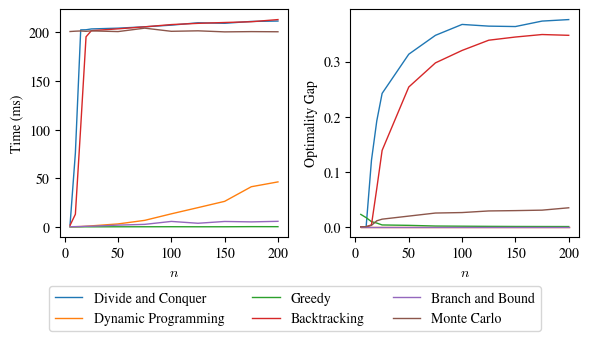

In [85]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.plot(times, linestyle='-')
plt.xlabel('$n$')
plt.ylabel('Time (ms)')
plt.subplot(1, 2, 2)
plt.plot(gaps, linestyle='-')
plt.xlabel('$n$')
plt.ylabel('Optimality Gap')
plt.figlegend(times.columns, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)
plt.tight_layout()
plt.savefig('plots/lab3_knapsack.svg', bbox_inches='tight')
plt.show()

### Deep Reinforcement Learning

See `POMO.ipynb`.
